# Setting things up

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
%run optimal_window.py

In [2]:
def capped_function_timer(instances, function, time_bound = 1):
    """ returns function on instances, but stops once it takes more than time_bound seconds """

    answer = []
    for x in instances:
        start = time()
        function(x)
        elapsed = time() - start
        answer.append(elapsed)        
        if elapsed > time_bound:
            break

    return answer
    

# Case study I: min()

Evaluate empirical performance of min(A) as a function of $n = |A|$

In [3]:
sizes = [ 2**i for i in range(1, 25)]
instances = [ np.random.rand(n) for n in sizes ]
runtimes = capped_function_timer(instances, min)

df = pd.DataFrame(zip(sizes, runtimes), columns = ['size', 'runtime'])

df.tail()


,size,runtime
19,1048576,0.048590
20,2097152,0.098753
21,4194304,0.198949
22,8388608,0.397962
23,16777216,0.796069


<AxesSubplot:xlabel='size', ylabel='runtime'>

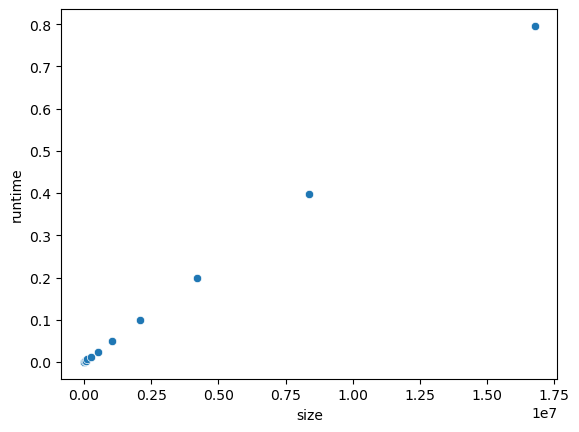

In [4]:
# Plot running times

sns.scatterplot(data=df, x='size', y='runtime')

<AxesSubplot:xlabel='size', ylabel='ratio'>

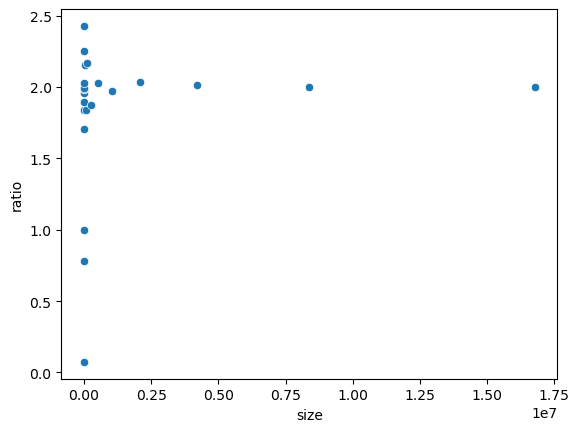

In [5]:
# Plot consecutive ratios

df.sort_values('size')
df['ratio'] = df['runtime'].pct_change() + 1
sns.scatterplot(data=df, x='size', y='ratio')

<AxesSubplot:xlabel='size', ylabel='guess_ratio'>

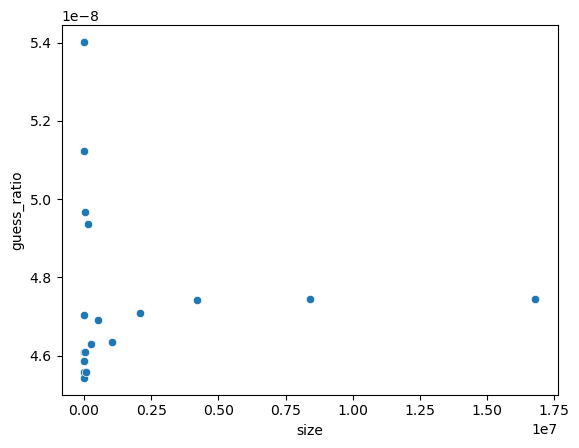

In [7]:
# Plot ratio to guess

df['guess'] = df['size'].apply(lambda x: x)
df['guess_ratio'] = df.runtime / df.guess
sns.scatterplot(data=df[df['size'] > 100], x='size', y='guess_ratio')

**Pro tip**: 
- If $T(n) = \Theta(f(n))$ then $T(n) / f(n) \rightarrow c$ as $n \rightarrow \infty$ where $c > 0$ is a constant
- If $T(n) = \Theta(n^d)$ then $T(2n)/T(n) \rightarrow 2^d$ as $n \rightarrow \infty$

# Case study II: sort()

Evaluate empirical performance of A.sort() as a function of $n = |A|$

In [14]:
sizes = [ 2**i for i in range(1, 25)]
instances = [ np.random.rand(n) for n in sizes ]
runtimes = capped_function_timer(instances, lambda x: x.sort())

df = pd.DataFrame(zip(sizes, runtimes), columns = ['size', 'runtime'])

df.tail()


,size,runtime
19,1048576,0.085470
20,2097152,0.168328
21,4194304,0.353288
22,8388608,0.772075
23,16777216,1.583331


<AxesSubplot:xlabel='size', ylabel='runtime'>

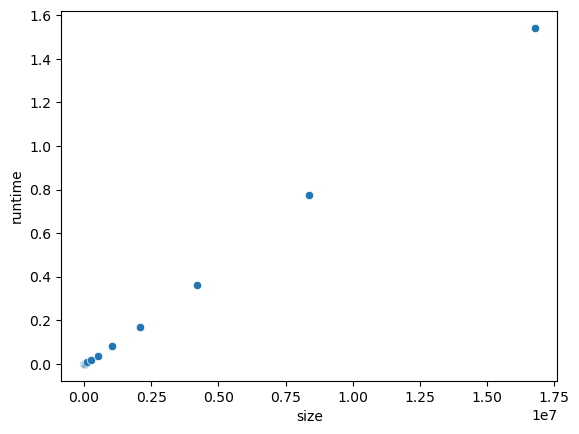

In [9]:
# Plot running times

sns.scatterplot(data=df, x='size', y='runtime')

<AxesSubplot:xlabel='size', ylabel='ratio'>

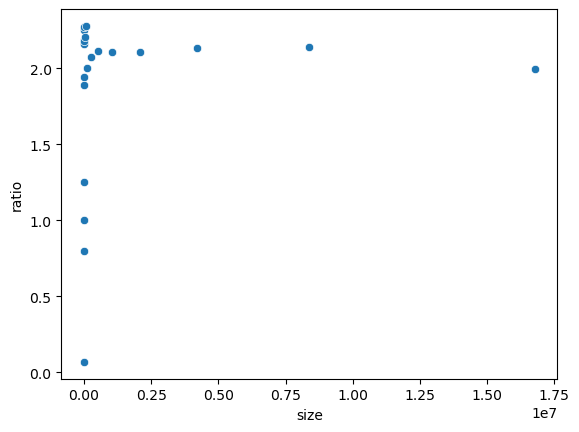

In [10]:
# Plot consecutive ratios

df.sort_values('size')
df['ratio'] = df['runtime'].pct_change() + 1
sns.scatterplot(data=df, x='size', y='ratio')

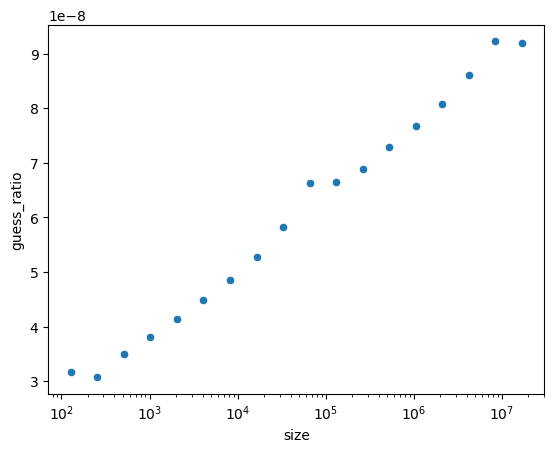

In [12]:
# Plot ratio to guess

df['guess'] = df['size'].apply(lambda x: x)
df['guess_ratio'] = df.runtime / df.guess
sns.scatterplot(data=df[df['size'] > 100], x='size', y='guess_ratio')
plt.xscale('log')

<AxesSubplot:xlabel='size', ylabel='guess_ratio'>

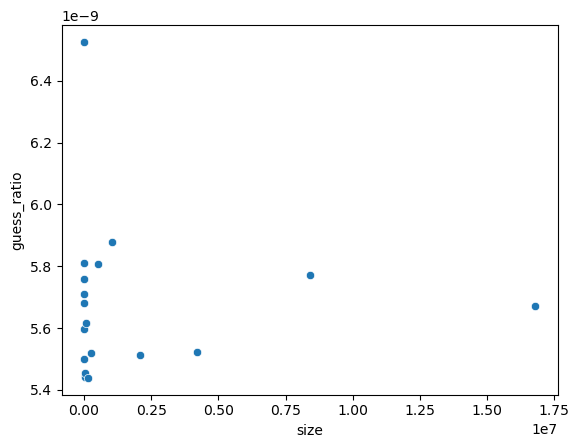

In [15]:
# Plot ratio to guess

df['guess'] = df['size'].apply(lambda x: x * math.log(x))
df['guess_ratio'] = df.runtime / df.guess
sns.scatterplot(data=df[df['size'] > 100], x='size', y='guess_ratio')

# Case Study III: Naive Trading winding

Naive algorithm runs in cubic time

In [19]:
sizes = [ 2**i for i in range(1, 20)]
instances = [ np.random.rand(n) - 0.5 for n in sizes ]
runtimes = capped_function_timer(instances, naive, time_bound=3)

df = pd.DataFrame(zip(sizes, runtimes), columns = ['size', 'runtime'])

df.tail()



,size,runtime
5,64,0.011938
6,128,0.074808
7,256,0.722496
8,512,2.316417
9,1024,36.006962


<AxesSubplot:xlabel='size', ylabel='runtime'>

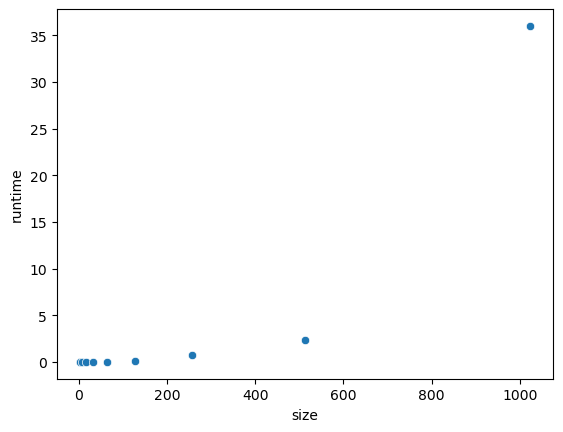

In [20]:
# Plot running times

sns.scatterplot(data=df, x='size', y='runtime')

<AxesSubplot:xlabel='size', ylabel='ratio'>

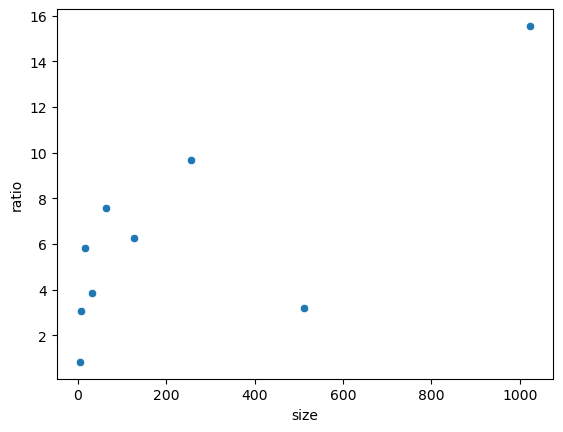

In [21]:
# Plot consecutive ratios

df.sort_values('size')
df['ratio'] = df['runtime'].pct_change() + 1
sns.scatterplot(data=df, x='size', y='ratio')

<AxesSubplot:xlabel='size', ylabel='guess_ratio'>

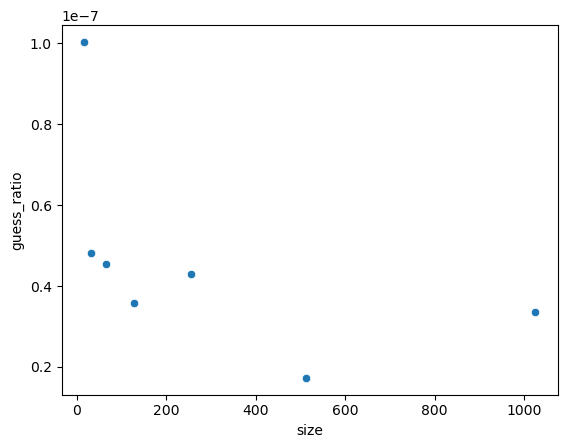

In [22]:
# Plot ratio to guess

df['guess'] = df['size'].apply(lambda x: x**3)
df['guess_ratio'] = df.runtime / df.guess
sns.scatterplot(data=df[df['size'] > 10], x='size', y='guess_ratio')

# Case Study IV: Naive + preprocessing Trading winding

Naive+preprocessing algorithm runs in cuadratic time

In [23]:
sizes = [ 2**i for i in range(1, 20)]
instances = [ np.random.rand(n) - 0.5 for n in sizes ]
runtimes = capped_function_timer(instances, preprocessing, time_bound=4)

df = pd.DataFrame(zip(sizes, runtimes), columns = ['size', 'runtime'])

df.tail()


,size,runtime
8,512,0.056497
9,1024,0.271578
10,2048,0.879960
11,4096,3.556492
12,8192,14.217062


<AxesSubplot:xlabel='size', ylabel='runtime'>

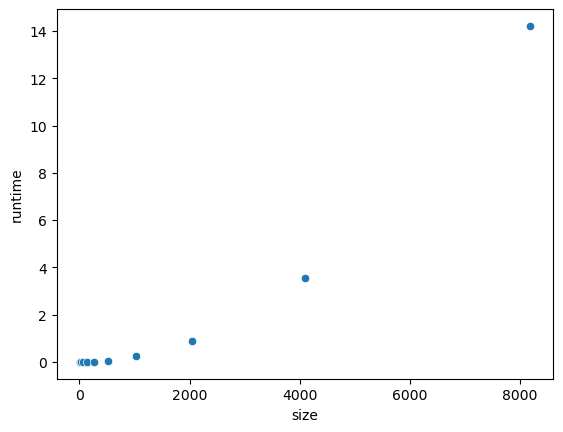

In [24]:
# Plot running times

sns.scatterplot(data=df, x='size', y='runtime')

<AxesSubplot:xlabel='size', ylabel='ratio'>

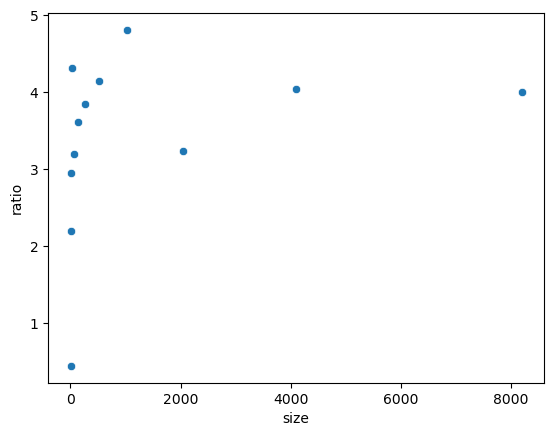

In [25]:
# Plot consecutive ratios

df.sort_values('size')
df['ratio'] = df['runtime'].pct_change() + 1
sns.scatterplot(data=df, x='size', y='ratio')

<AxesSubplot:xlabel='size', ylabel='guess_ratio'>

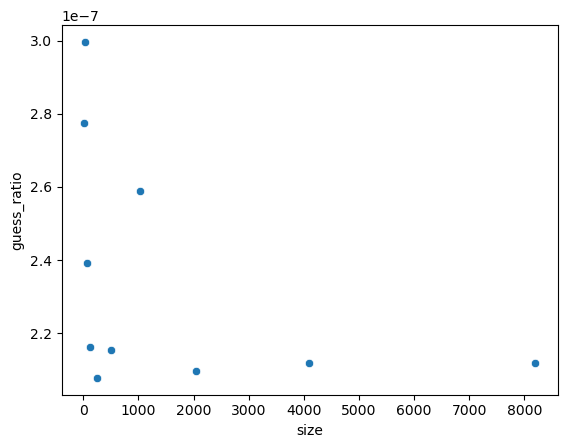

In [26]:
# Plot ratio to guess

df['guess'] = df['size'].apply(lambda x: x**2)
df['guess_ratio'] = df.runtime / df.guess
sns.scatterplot(data=df[df['size'] > 10], x='size', y='guess_ratio')

# Case Study IV

In [27]:
sizes = [ 2**i for i in range(1, 20)]
instances = [ np.random.rand(n) - 0.5 for n in sizes ]
runtimes = capped_function_timer(instances, reuse_computation, time_bound=4)

df = pd.DataFrame(zip(sizes, runtimes), columns = ['size', 'runtime'])

df.tail()


,size,runtime
14,32768,0.019369
15,65536,0.037535
16,131072,0.075806
17,262144,0.150839
18,524288,0.303137


<AxesSubplot:xlabel='size', ylabel='guess_ratio'>

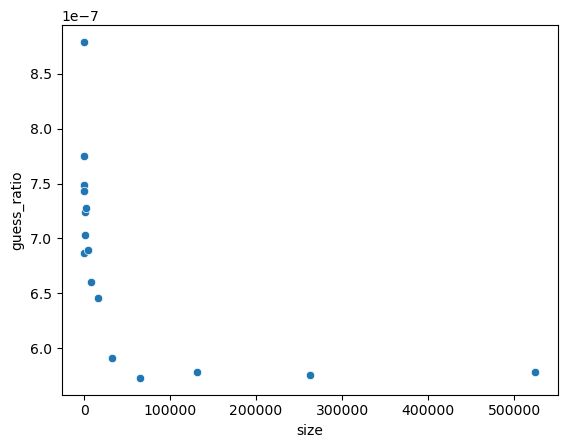

In [28]:
# Plot ratio to guess

df['guess'] = df['size'].apply(lambda x: x)
df['guess_ratio'] = df.runtime / df.guess
sns.scatterplot(data=df[df['size'] > 10], x='size', y='guess_ratio')